<a href="https://colab.research.google.com/github/amita30malik/AI-Meme-Generator-using-Image-and-Caption-Synthesis/blob/main/AI_Meme_Generator_using_Image_and_Caption_Synthesis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import zipfile
import os

zip_path = '/content/imgflipscraped-memes-caption-dataset.zip'
extract_folder = '/content/meme_images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Files extracted!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/imgflipscraped-memes-caption-dataset.zip'

In [ ]:
import zipfile
import os

zip_path = "/content/imgflipscraped-memes-caption-dataset.zip"  # or adjust if you renamed
extract_to = "/content/meme_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extraction complete.")


✅ Extraction complete.


In [4]:
for root, dirs, files in os.walk("/content/meme_data"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


In [5]:
import os

for root, dirs, files in os.walk("/content/meme_data"):
    for file in files:
        print(os.path.join(root, file))



In [6]:
import pandas as pd

df = pd.read_csv("/content/meme_data/memes_data.tsv", sep='\t')  # tab-separated
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/meme_data/memes_data.tsv'

In [7]:
print(df.columns)


NameError: name 'df' is not defined

In [2]:
import os
import requests
from PIL import Image
from io import BytesIO


df['ImageURL'] = df['ImageURL'].apply(lambda url: f"https:{url}" if url.startswith("//") else url)


image_folder = "/content/meme_images"
os.makedirs(image_folder, exist_ok=True)


for i, row in df['ImageURL'].dropna().sample(10, random_state=42).reset_index(drop=True).items():
    try:
        response = requests.get(row, timeout=5)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img_path = os.path.join(image_folder, f"meme_{i}.jpg")
            img.save(img_path)
            print(f"Saved: {img_path}")
        else:
            print(f"Failed to download: {row}")
    except Exception as e:
        print(f"Error with {row}: {e}")



NameError: name 'df' is not defined

In [1]:
from PIL import Image, ImageDraw, ImageFont
import textwrap
import os


img_path = "/content/meme_images/meme_0.jpg"
image = Image.open(img_path)
draw = ImageDraw.Draw(image)


caption = "When your code works on the first try 🤯"


font = ImageFont.load_default()


wrapped_caption = textwrap.fill(caption, width=30)
width, height = image.size
margin = 40


bbox = draw.multiline_textbbox((0, 0), wrapped_caption, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]


text_x = (width - text_width) / 2
text_y = height - text_height - margin


draw.rectangle(
    [(text_x - 10, text_y - 10), (text_x + text_width + 10, text_y + text_height + 10)],
    fill="black"
)


draw.multiline_text((text_x, text_y), wrapped_caption, font=font, fill="white", align="center")


image.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/meme_images/meme_0.jpg'

In [ ]:
import os

image_dir = '/content/meme_images'
image_files = []

# Walk through all subdirectories
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

# Show results
print("Found", len(image_files), "image files")
if image_files:
    print("Example image path:", image_files[0])


Found 10 image files
Example image path: /content/meme_images/meme_4.jpg


In [ ]:
image.save("/content/captioned_meme.jpg")


In [ ]:
#for 5 meme images


captions = [
    "When your code works on the first try 🤯",
    "How it feels to study all night 😴📚",
    "When AI takes over your job 🤖💼",
    "Waiting for the internship result like ⏳",
    "When you debug for hours and it was a typo 🔍🧠"
]

for i in range(len(captions)):
    img_path = f"/content/meme_images/meme_{i}.jpg"
    image = Image.open(img_path)
    draw = ImageDraw.Draw(image)

    caption = captions[i]
    wrapped_caption = textwrap.fill(caption, width=30)

    font = ImageFont.load_default()
    width, height = image.size
    margin = 40

    bbox = draw.multiline_textbbox((0, 0), wrapped_caption, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    text_x = (width - text_width) / 2
    text_y = height - text_height - margin

    draw.rectangle(
        [(text_x - 10, text_y - 10), (text_x + text_width + 10, text_y + text_height + 10)],
        fill="black"
    )
    draw.multiline_text((text_x, text_y), wrapped_caption, font=font, fill="white", align="center")

    image.save(f"/content/final_meme_{i}.jpg")


In [ ]:
#for 10 meme images
captions = [
    "When your code works on the first try 🤯",
    "How it feels to study all night 😴📚",
    "When AI takes over your job 🤖💼",
    "Waiting for the internship result like ⏳",
    "When you debug for hours and it was a typo 🔍🧠",
    "The moment you understand recursion 🌀",
    "Trying to deploy without breaking production 😅",
    "When Git finally merges without conflict 🤝",
    "First day at internship vs last day 💼➡️💀",
    "Me explaining my code vs how it actually works 🧑‍🏫💻"
]
for i in range(len(captions)):
    img_path = f"/content/meme_images/meme_{i}.jpg"
    image = Image.open(img_path)
    draw = ImageDraw.Draw(image)

    caption = captions[i]
    wrapped_caption = textwrap.fill(caption, width=30)

    font = ImageFont.load_default()
    width, height = image.size
    margin = 40

    bbox = draw.multiline_textbbox((0, 0), wrapped_caption, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    text_x = (width - text_width) / 2
    text_y = height - text_height - margin

    draw.rectangle(
        [(text_x - 10, text_y - 10), (text_x + text_width + 10, text_y + text_height + 10)],
        fill="black"
    )
    draw.multiline_text((text_x, text_y), wrapped_caption, font=font, fill="white", align="center")

    image.save(f"/content/final_meme_{i}.jpg")


In [ ]:
import zipfile

with zipfile.ZipFile("/content/final_memes.zip", "w") as zipf:
    for i in range(len(captions)):
        file_path = f"/content/final_meme_{i}.jpg"
        zipf.write(file_path, arcname=f"meme_{i}.jpg")


🖼️ Meme 1: When your code works on the first try 🤯


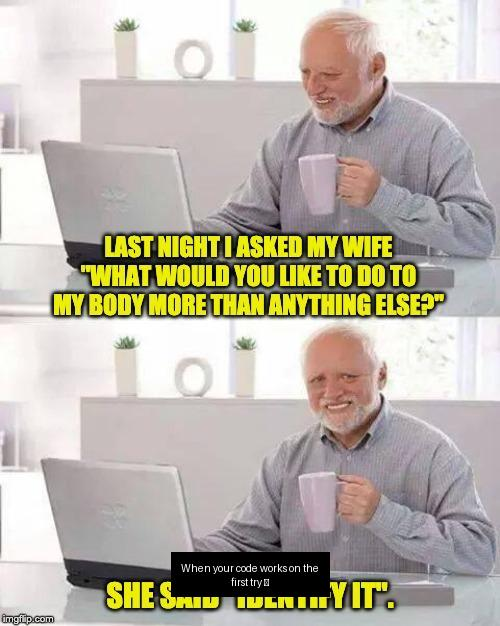

🖼️ Meme 2: How it feels to study all night 😴📚


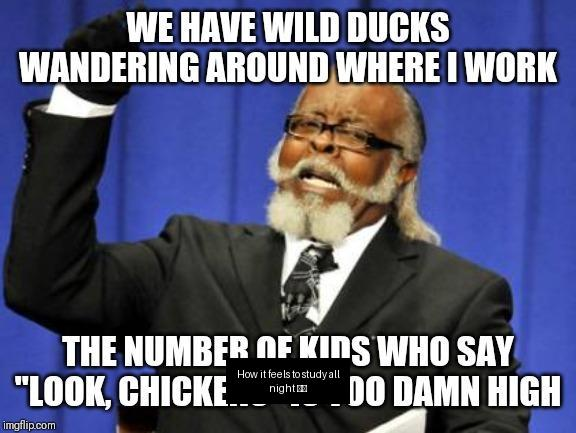

🖼️ Meme 3: When AI takes over your job 🤖💼


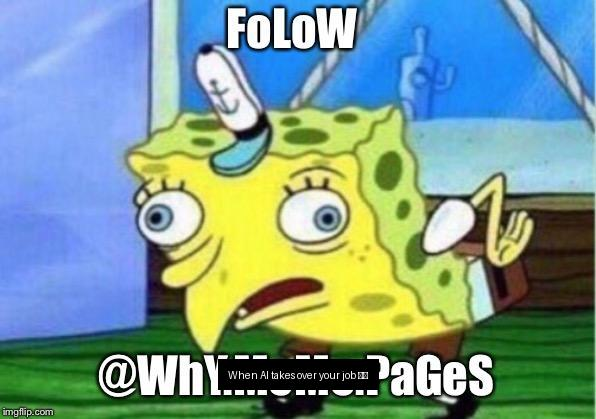

🖼️ Meme 4: Waiting for the internship result like ⏳


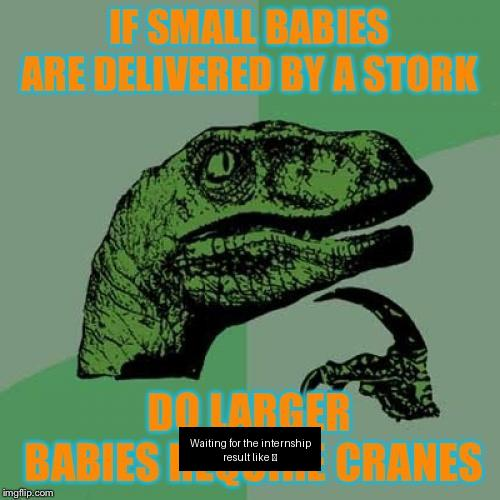

🖼️ Meme 5: When you debug for hours and it was a typo 🔍🧠


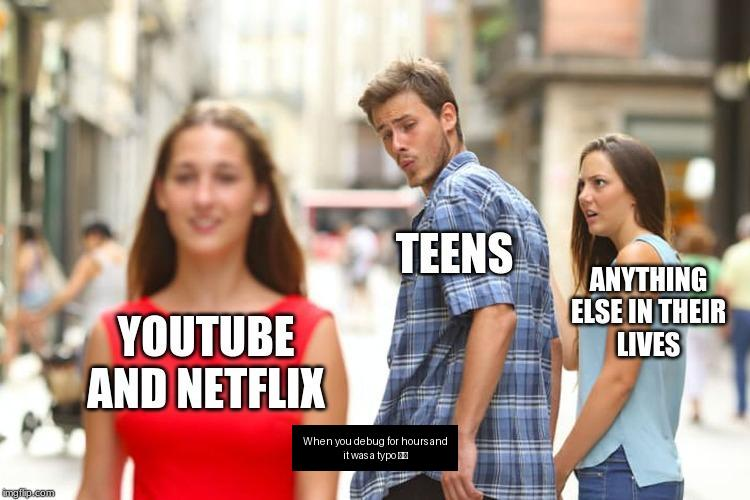

🖼️ Meme 6: The moment you understand recursion 🌀


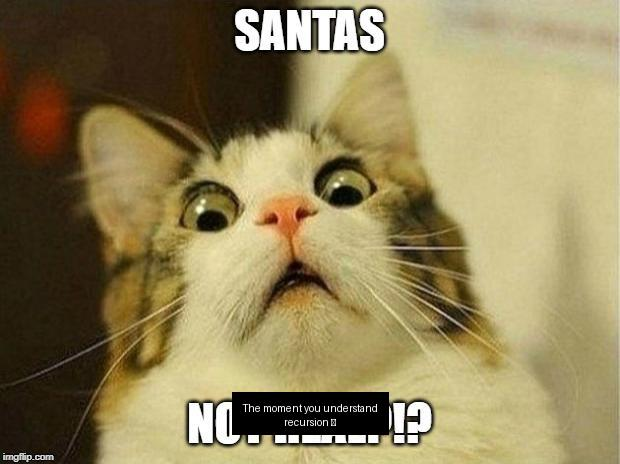

🖼️ Meme 7: Trying to deploy without breaking production 😅


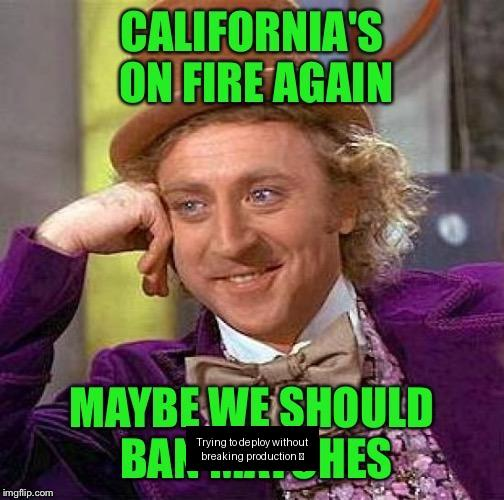

🖼️ Meme 8: When Git finally merges without conflict 🤝


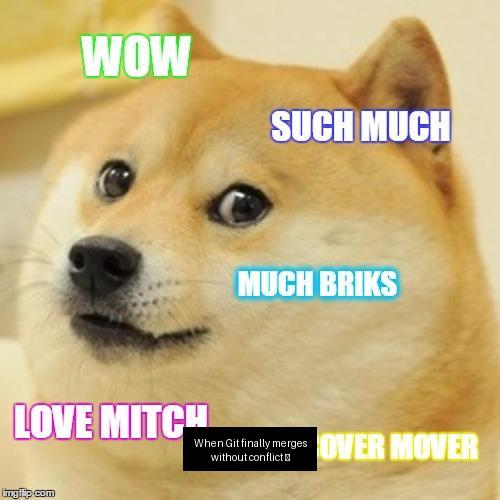

🖼️ Meme 9: First day at internship vs last day 💼➡️💀


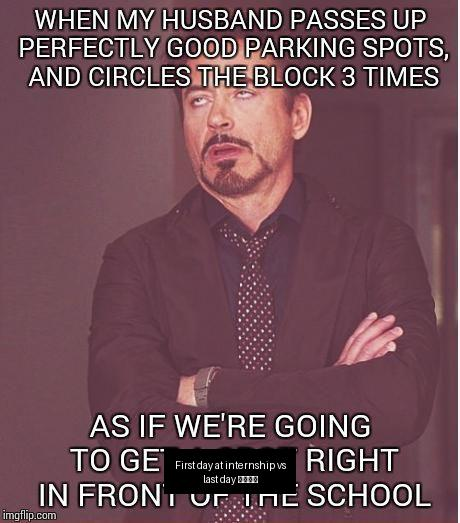

🖼️ Meme 10: Me explaining my code vs how it actually works 🧑‍🏫💻


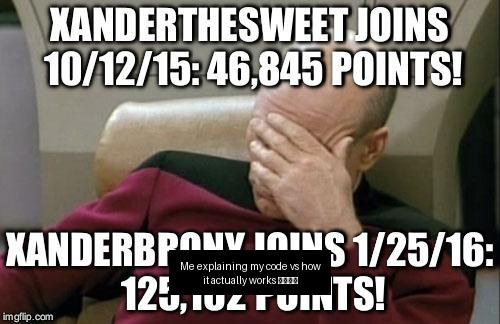

In [ ]:
from IPython.display import display
from PIL import Image

# Display all generated memes
for i in range(len(captions)):
    file_path = f"/content/final_meme_{i}.jpg"
    image = Image.open(file_path)
    print(f"🖼️ Meme {i+1}: {captions[i]}")
    display(image)


In [ ]:
prompts = [
    "When your code works on the first try",
    "How it feels to study all night",
    "When AI takes over your job",
    "Waiting for the internship result like"
]

for p in prompts:
    print(f"🗯️ Prompt: {p}")
    print(f"💬 Caption: {generate_caption(p)}\n")


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🗯️ Prompt: When your code works on the first try


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


💬 Caption: When your code works on the first try, the compiler will try to find an error code that says the function returns a new object.

function is() { return [ 'foo' , '

🗯️ Prompt: How it feels to study all night


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


💬 Caption: How it feels to study all night, and then go to bed without any sleep?

I've been studying this for the last three years. I've seen a lot of people on the Internet

🗯️ Prompt: When AI takes over your job


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


💬 Caption: When AI takes over your job, you'll have to adapt to your new skills. Your job's job is to make sure the AI is doing its job right, not just when it's doing it

🗯️ Prompt: Waiting for the internship result like
💬 Caption: Waiting for the internship result like this, it is not an easy process, and it will take many years.

I am not sure if you are comfortable with this process. You should be



In [ ]:
def generate_caption(prompt, max_length=40):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs["input_ids"],
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        do_sample=True,
        early_stopping=True
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# GPT-2 doesn't have padding token, so assign it to eos
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Or other models
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [10]:
def clean_caption(text):
    return text.strip().lower()

texts = [clean_caption(t) for t in texts]


NameError: name 'texts' is not defined

In [ ]:
# Prepare text data using correct column
texts = captions_df['CaptionText'].dropna().astype(str).tolist()
texts = [t for t in texts if 10 < len(t) < 150]


In [ ]:
# Step 4: Explore the data correctly
print(f"Number of captions: {len(captions_df)}")
print(captions_df.isnull().sum())
print(captions_df['CaptionText'].sample(10).tolist())


Number of captions: 202208
AltText        0
CaptionText    0
ImageURL       0
HashId         0
MemeLabel      0
dtype: int64
[' WHEN I MAKE A FORTNITE KILL TAKE THE L ', ' shut up do the simple action of pressing both lips together and ceasing to make noise ', ' HEY PETER PARKER                                                                                                                             ', ' ORDER TO NUKE KOREA YES, SIR! ', " BAN ALL GUNS TO KEEP CHILDREN FROM BEING KILLED KEEP ABORTING BABIES, BECAUSE IT'S JUST A FETUS LIBERALS ", " I DONT ALWAYS PRAISE THE ESSENTIAL WORKERS.... BUT WHEN I DO I INCLUDE THE SERVICE AND VEHICLE TECH'S ", " PARENTS: WILL GIVE YOU BACK YOUR PHONE IF YOU DON'T USE IT FOR A WEEK!\r\nME: ", ' OH, LOOK! RUSSIA COPIED ANNA ', ' WHEN YOUR SQAUD SEES A GOLD SCAR ', ' *SEES FETUS* MOM: ']


In [11]:
# Check how many samples you have
print(f"Number of captions: {len(captions_df)}")

# Check for nulls
print(captions_df.isnull().sum())

# Preview sample captions
captions_df['CaptionText'].sample(10).tolist()


NameError: name 'captions_df' is not defined

In [14]:
import pandas as pd

# Load the captions and references
captions_df = pd.read_csv('meme_dataset/memes_data.tsv', sep='\t')
references_df = pd.read_csv('meme_dataset/memes_reference_data.tsv', sep='\t')

# View a few examples
captions_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'meme_dataset/memes_data.tsv'

In [16]:
!kaggle datasets download -d abhishtagatya/imgflipscraped-memes-caption-dataset
!unzip imgflipscraped-memes-caption-dataset.zip -d meme_dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open imgflipscraped-memes-caption-dataset.zip, imgflipscraped-memes-caption-dataset.zip.zip or imgflipscraped-memes-caption-dataset.zip.ZIP.


In [15]:
# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle


In [ ]:
!pip install transformers
!pip install torch
!pip install Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin